<a href="https://colab.research.google.com/github/Trieunguyen1/h-c-m-y/blob/main/superviesd_Learning__thu%E1%BA%ADn_to%C3%A1n_ph%C3%A2n_lo%E1%BA%A1i.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Đối dữ liệu phía dưới  thuật toán phân loại Y : chỉ nhận giá trị 0 hoặc 1 (0 là rớt hoặc 1 là đậu)
#Có nghĩa là có hoặc không vd: Y : có bị bênh hoặc không bị bênh
#                          vd: Y : có mưa hoặc không có mưa

In [ ]:
#Y cũng có thể phân loại nhiều nhóm khác

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('/content/bangdiem2.xlsx')
#hiện bản điểm lên
print(df) # 

   so_gio_hoc  diem
0           2     0
1           3     0
2           4     0
3           5     0
4           6     0
5           7     1
6           8     1
7           9     1
8          10     1


In [ ]:
#mô hình hồi quy logistic 
# thực chất tìm xác suất đúng nhất phân lớp đối tượng để đưa ra kết luận có hoặc không. 
#f(y) >= 0.5 thì Yes, f(y) < 0.5 thì No (f(y) là hàm hồi quy logistic

In [ ]:
#mô hình hồi quy logistic 1 biến
# link bài giảng: https://www.youtube.com/watch?v=Tji8QSVX3_4&list=PLWBrqglnjNl17CA7H7RGr9uHAbDKbwRKq&index=6

In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.linear_model import LogisticRegression, LinearRegression
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

In [5]:
filename = "hoursOfStudy.csv"
dataframe = pd.read_csv(filename)
dataframe.columns
print(dataframe)
#dataframe

    hours of study  Pass
0             0.20     0
1             0.30     0
2             0.40     0
3             0.50     0
4             0.60     0
5             0.80     0
6             1.00     0
7             1.25     0
8             1.50     0
9             1.75     0
10            1.75     1
11            2.00     0
12            2.25     1
13            2.50     0
14            2.75     1
15            3.00     0
16            3.25     1
17            3.50     0
18            4.00     1
19            4.25     1
20            4.50     1
21            4.75     1
22            5.00     1
23            5.25     1
24            6.00     1
25            6.50     1
26            6.75     1
27            7.00     1


In [6]:
# biến dùng để train và test 
X = dataframe.drop(['Pass'], axis='columns') # tách cột 'pass'
y = dataframe['Pass']


In [ ]:
#thuật toán hồi quy tuyến tính dùng để quan sát trên biểu đồ
linear_regression = LinearRegression()
#train this model
linear_regression.fit(X, y)

In [8]:
# chọn thuật toán logistic regression
logistic_regression = LogisticRegression()
#train the model
logistic_regression.fit(X,y)

LogisticRegression()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


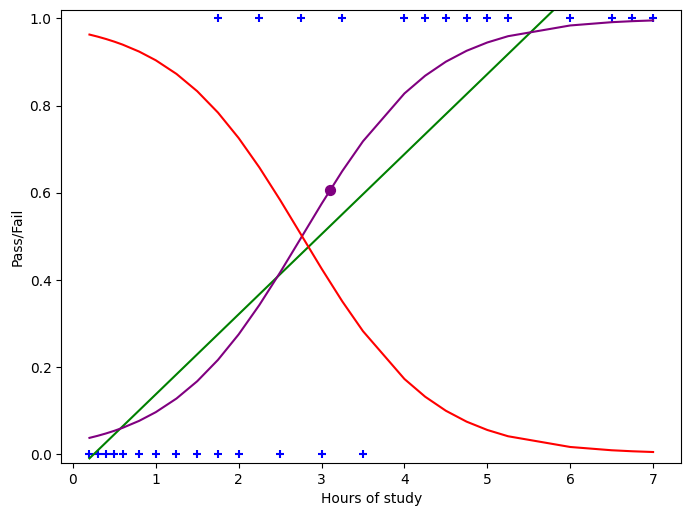

In [9]:
"câu lệnh dùng để điều chỉnh kích thước của biểu đồ bên dưới"
figure(figsize=(8, 6), dpi=100)

"đặt tên cho trục x: Hours of study, đặt tên cho trục y:Pass/Fail"
plt.xlabel('Hours of study')
plt.ylabel('Pass/Fail')

"giới hạn đầu trên và đầu dưới của trục y"
plt.ylim(-0.02, 1.02)

"vẽ các điểm giá trị X và y tương ứng trong tập dữ liệu"
# marker là biểu tượng để giá trị X hiển thị lên trên biểu đồ , vd: marker = '+' thì X dc thể hiện trên biểu đồ là dấu +
# color là màu sắc của X vd: color = 'blue' thì là màu xanh dương
plt.scatter(X, y, marker='+', color='blue')  

"vẽ đường thẳng linear regression"
#plt.plot(X, linear_regression.coef_*X + linear_regression.intercept_, color='green')

#vẽ đồ thị của phần pass qua môn
plt.plot(X, pd.DataFrame(logistic_regression.predict_proba(X))[1], color='purple')
#vẽ đồ thị của phần tạch 
plt.plot(X, pd.DataFrame(logistic_regression.predict_proba(X))[0], color='red')

"phần tử X"
# s ở đây là size:kích cỡ của giá trị X hiển thị trên biểu đồ
plt.scatter(3.1, (logistic_regression.predict_proba([[3.1]]))[0][1], color='purple', marker='.', s=200)

In [15]:
#predict Probability : lệnh ham.predict_proba() dùng để biểu thị xác suất xảy ra có pass/faile trong tập dữ liệu này
logistic_regression.predict_proba([[3.1]]) # giá trị X luôn là mảng 2 chiều đặt [[giá trị X cần dự đoán]]

#0.39501417+0.60498583 = 1
"kết quả: cho thấy xác suất để tạch = 0.39501417,xác suất để được pass qua:0.60498583"


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1])

In [16]:
# kết quả dự đoán tại X = 3.1 (nghĩa là học được 3.1 giờ)
logistic_regression.predict([[3.1]])
"kết quả là array([1]) có nghĩa là học trong 3.1 giờ thì được pass qua môn"

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1])

In [21]:
pd.DataFrame(logistic_regression.predict_proba(X)) # cột bên trái là xác suất để tạch môn (dốt)
                                     # cột bên phải là xác suất để pass cho môn

,0,1
0,0.962967,0.037033
1,0.958160,0.041840
2,0.952760,0.047240
3,0.946701,0.053299
4,0.939914,0.060086
5,0.923854,0.076146
6,0.903941,0.096059
7,0.872603,0.127397
8,0.832931,0.167069
9,0.783963,0.216037


In [22]:
"lấy xác suất của phần pass qua môn"
pd.DataFrame(logistic_regression.predict_proba(X))[1]

0     0.037033
1     0.041840
2     0.047240
3     0.053299
4     0.060086
5     0.076146
6     0.096059
7     0.127397
8     0.167069
9     0.216037
10    0.216037
11    0.274624
12    0.342166
13    0.416775
14    0.495401
15    0.574255
16    0.649504
17    0.717985
18    0.827748
19    0.868456
20    0.900698
21    0.925714
22    0.944813
23    0.959219
24    0.983870
25    0.991389
26    0.993717
27    0.995419
Name: 1, dtype: float64

In [ ]:
#thuật toán hồi quy logicstic nhiều biến
# link video bài giảng:https://www.youtube.com/watch?v=PcsTc-yJV7U&list=PLWBrqglnjNl17CA7H7RGr9uHAbDKbwRKq&index=7

In [24]:
import pandas as pd # thư viện hỗ trợ các thao tác dữ liệu trong python
import numpy as np  # thư viện chuyên về làm việc với mảng
import math  
from sklearn.linear_model import LogisticRegression  # dùng thuật toán LogisticRegression từ thư viện sklearn
import matplotlib.pyplot as plt # thư viện dùng để vẽ biểu đồ
from matplotlib.pyplot import figure # dùng figure trong thư viện matplotlib.pyplot
from sklearn.datasets import load_digits # load_digits chứa ảnh dữ liệu từ 0-9 dưới dạng số
from sklearn.model_selection import train_test_split # dùng để chia dữ liệu ra để train và test 
#show different between "true" value and "predicted" value
from sklearn.metrics import confusion_matrix # dùng để biểu diễn sự trục quan giữa dữ liệu đầu ra dự đoán và dữ liệu đầu ra ban đầu

In [27]:
digits = load_digits()
dir(digits) # dùng để hiện tên các index 
"quan tâm: data, images, taget"
# data: là dữ liệu dùng để train và test
# taget: là kết quả của từng dữ liệu đầu vào

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
#khảo sát sơ để hiểu ra thư viện load_digits

In [29]:
len(digits['images']) # hiện tổng số ảnh trong load_digits
"kết quả: 1797 ảnh tính từ phần tứ [0] đến phần tử [1796]"

'kết quả: 1797 ảnh tính từ phần tứ [0] đến phần tử [1796]'

In [30]:
#hiện phần tử thứ [0] của images
digits['images'][0] # dữ liệu có 8x8 matrix

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [31]:
digits['images'][0].shape # dùng lệnh này thì khỏi cần đếm

(8, 8)

4

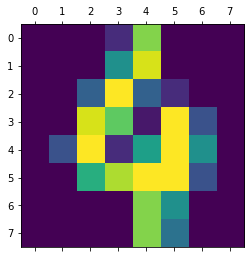

In [32]:
#hiện phần tử thứ 101 của images"
plt.matshow(digits['images'][100])

#đầu ra của images[100] là target[100]"
digits['target'][100]
"ta thấy kết quả hiện trên màn hình là số 4"
#classification

In [34]:
"images 8x8 -> data 1x64 -> target"
# dữ liệu của phần tử thứ 16
digits['data'][15] 
digits['target'][15]
"kết quả đầu ra là số 5"

5

In [36]:
#gán dữ liệu cho biến X và y
X = digits['data'] # dữ liệu đầu vào
y = digits['target'] # dữ liệu đầu ra

#hiện X và y
print('dữ liệu của X:\n',X)
print('dữ liệu của Y:\n',y)

dữ liệu của X:
 [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
dữ liệu của Y:
 [0 1 2 ... 8 9 8]


In [37]:
# tách phần dữ liệu dùng để train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  # dữ liệu test là 20% còn dữ liệu train là 80%

In [38]:
#gọi thuật toán 
model = LogisticRegression()
#train the model with "training set"
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [39]:
#kiểm tra mô hình thử độ chính xác là bao nhiêu
model.score(X_test, y_test)

0.9666666666666667

In [45]:
#hiện dữ liệu X và y
print('mảngX:\n',X_test[2])
print('kết quả target[2]:\n',y_test[2]) # y_test là giá trị đúng ban đầu

mảngX:
 [ 0.  0.  8. 12. 13.  1.  0.  0.  0.  5. 12.  2.  6. 13.  0.  0.  0. 11.
  5.  0.  6. 12.  0.  0.  0.  7. 10.  4. 13. 15.  0.  0.  0.  1. 11. 12.
  7. 12.  4.  0.  0.  0.  0.  0.  0.  4.  9.  0.  0.  0. 10.  5.  0.  3.
 13.  0.  0.  0.  6. 12. 16. 13. 10.  0.]
kết quả target[2]:
 9


In [46]:
#test dữ liệu
model.predict([X_test[2]])
"kết quả array([9]) có nghĩa là đã train thành công" 

array([9])

In [49]:
#predict probability
model.predict_proba([X_test[2]]) # xác suất để xảy ra số 9

#  8.14587344e-09 xác suất xảy ra số 0
#  2.76562764e-11 xác suất xảy ra số 1
#  1.67968560e-09 xác suất xảy ra số 2
#  2.22389146e-05 xác suất xảy ra số 3
#  7.63454772e-12 xác suất xảy ra số 4
#  6.70312102e-09 xác suất xảy ra số 5
#  1.92455677e-10 xác suất xảy ra số 6
#  1.43863337e-08 xác suất xảy ra số 7
#  2.31465438e-06 xác suất xảy ra số 8
#  9.99975415e-01 xác suất xảy ra số 9


array([[8.14587344e-09, 2.76562764e-11, 1.67968560e-09, 2.22389146e-05,
        7.63454772e-12, 6.70312102e-09, 1.92455677e-10, 1.43863337e-08,
        2.31465438e-06, 9.99975415e-01]])

In [52]:
#đánh giá mô hình logicstic regression có tốt hay không
"confusion_matrix(y_test, model.predict(X_test)) "
'trong đó: y_test là giá trị đúng có trong bản dữ liệu ban đầu , model.predict(X_test) là giá trị dự đoán'
confusion_matrix(y_test, model.predict(X_test))

array([[40,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 41,  0,  0,  0,  1,  2,  0],
       [ 0,  1,  0,  0, 34,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 34,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 31,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 32,  0,  0],
       [ 0,  2,  0,  0,  0,  1,  0,  0, 34,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 37]])

Text(137.77777777777777, 0.5, 'True values')

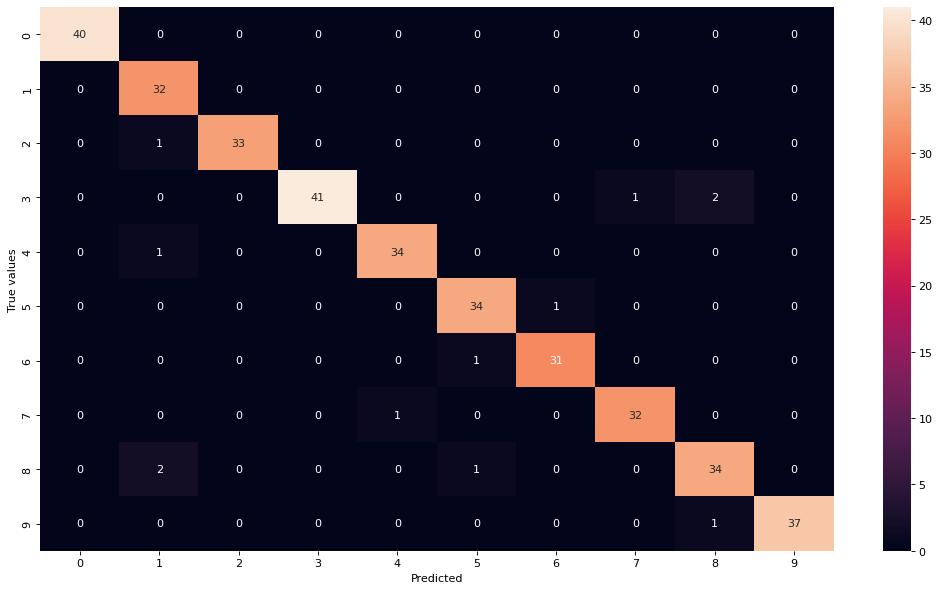

In [51]:
#để thấy rõ hơn sự tương quan của nó ta vẽ biểu đồ
import seaborn
plt.figure(figsize = (16,9), dpi=80)
seaborn.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot=True)
plt.xlabel("Predicted")
plt.ylabel("True values")